# Descriptive Statistics and Data Visualization
This notebook covers exploratory analysis for 430 features<br>
coming from 9 different categories of clinical data<br>
The analysis will include three steps:<br>
1. Extract Descriptive Statistics for each feature
2. Visualize the distribution 
3. Brief Summary of Findings

<br>

| Table Name |variable prefix|columns |DType |Description | 
| :--- | :--- | :--- | :--- | :--- |
| Research Session Attendance|rsa_|25 |Binary|Records attendence for each week of treatment | 
| Demographics|dem_|10 |Categorical|Sex, Ethnicity, Race | 
| Urine Drug Screen| test_|225|Binary  |Drug test for 8 different drug classes, taken weekly for 24 weeks | 
| DSM-IV Diagnosis|dsm_|6|Categorical |Tracks clinical diagnosis for substance use disorder, in accordance with DSM guidelines| 
| Medical and Psychiatric History|mdh_|18|Categorical |Tracks medical and psychiatric history of 18 different Conditions| 
| Physical Exam|pex_|12|Categorical |Tracks the appearance and condition of patients for 12 different physical observations| 
| Timeline Follow Back Survey|survey_|70|Numeric |Surveys for self reported drug use, collected every 4 weeks, records total number of instances of drug use for the previous 30 days|
| Dose Record |meds_|50|Numeric |Records the medication, averge weekly dose and week of treatment| 


### Import Required Libraries

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # enhanced visualization
import warnings # ignore warnings
import helper # custom data transformation functions
from IPython.display import display, Markdown # display and markdown conversion
import re # regular expressions
warnings.filterwarnings('ignore') # ignore warnings

# Load the data
data = pd.read_csv('../data/benchmark_features.csv')

# Display the first few rows of the data
data.shape

(1321, 61)

In [2]:
df = data[[col for col in data.columns if 'survey_' in col]]

df.describe()

,survey_opiates_0,survey_opiates_4
count,1321.000000,1321.000000
mean,24.322483,4.548827
std,9.824082,7.880793
min,0.000000,0.000000
25%,23.000000,0.000000
50%,30.000000,0.000000
75%,30.000000,6.000000
max,32.000000,52.000000


### Review RSA: Research Session Attendence
Research Session Attendance: RSA<br>
Records attendence for 24 weeks of treatment. <br>
Recorded each week<br>

Descriptive statistics for each week of attendence:<br>
- Avg weekly attendance 851 patients per week
- Avg proportion of patients attending weekly 44%
<br>


<br>
We will plot the weekly distribution of percentage of patients attending treatment

In [ ]:
# create df for rsa clinical data
rsa = helper.series_func(data, 'rsa', 'mean')

# set params to plot the data series
series, title, ylabel, xlabel = rsa, 'Weekly Attendance', 'Attendance', 'Week of Treatment'

# call helper function to plot the data series
helper.plot_func(series, title, ylabel, xlabel)
# create bespoke annotation for this table
plt.annotate(
        f"Weekly average {series.mean().round(2)}% attendance",
        xy=(0.5, 0.5),
        xycoords="axes fraction",
        ha="center",
        va="center",
        fontsize=12,
        color="black",
    );

In [ ]:
from scipy.stats import bernoulli
# create bernoulli distribtution for rsa

# define probability of success
p = series.mean()

# calculate pmp values for outcomes 0 and 1
pmf_values = bernoulli.pmf([0, 1], p)

# create a figure and axis
plt.bar([0, 1], pmf_values, tick_label=['Absent', 'Present'])
plt.title('Bernoulli Distribution for RSA Attendance')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()

### Review Demographic Data
Demographics: DEM<br>
Data includes response to questions about gender, race and ethnicity<br>
Data includes 12 different responses<br>
Data collected at baseline assessment<br>

<br>

|    | column                    | value              |   count |   percentage |
|---:|:--------------------------|:-------------------|--------:|-------------:|
|  0 | dem_gender                | male               |    1283 |         0.67 |
|  1 | dem_gender                | female             |     631 |         0.33 |
|  3 | dem_ethnicity             | not_spanish_origin |    1579 |         0.82 |
|  4 | dem_ethnicity             | spanish_origin     |     328 |         0.17 |
|  7 | dem_race_no_answer        | 1.0                |       5 |         0    |
|  9 | dem_race_unknown          | 1.0                |       8 |         0    |
| 11 | dem_race_amer_ind         | 1.0                |      85 |         0.04 |
| 13 | dem_race_asian            | 1.0                |      29 |         0.02 |
| 15 | dem_race_black            | 1.0                |     233 |         0.12 |
| 17 | dem_race_pacific_islander | 1.0                |      12 |         0.01 |
| 18 | dem_race_white            | 1.0                |    1379 |         0.72 |
| 21 | dem_race_other            | 1.0                |     284 |         0.15 |

In [ ]:
# This code creates an efficient table to view value_counts of the demographics data

# create the demographics dataframe
dem = data[[col for col in data.columns if col.startswith('dem_')]]

# call the helper function to extract the value counts and organize them into a table
result_df = helper.df_value_counts(dem)

# remove index row 2, 5 - these have mostly missing values and not useful for analysis
result_df = result_df.drop(result_df.index[[2,5]])

# remove values with 0.0 - these are the negative binary response, not useful for analysis
result_df = result_df[result_df['value'] != 0.0]

# display the table in markdown
display(Markdown(result_df.to_markdown()))


In [ ]:
# separate the data into two groups based on the value
groups = ['gender', 'ethnicity','race']
for dem in groups:
    # create dataframe for each group, for rows that have dem in column
    globals()[dem] = result_df[result_df['column'].str.contains(dem)]
    # sort values by count in descending order
    globals()[dem] = globals()[dem].sort_values(by='count', ascending=False)
    # convert to markdown
    print(dem)
    display(Markdown(globals()[dem].to_markdown()))
    

### Visualize Demographic Data

In [ ]:
# create 3 subplots together for genger, ethnicity and race dfs
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, dem in enumerate(groups):
    # plot the data
    sns.barplot(data=globals()[dem], x='value', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{dem.capitalize()}')
    # set the x label
    axes[i].set_xlabel(f'{dem.capitalize()}')
    # set the y label
    axes[i].set_ylabel('')
    # remove the ylabels
    
    # Assuming axes is a collection of matplotlib Axes objects
new_labels = ['white', 'black', 'am-ind', 'asian', 'pac-isl', 'unknown', 'no_answer']
axes[2].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');
# create more space between xlabel and xticklabels
# remove the ylabel


### Review UDS Data
Urine Drug Screen: UDS<br>
Drug test for 8 different drug classes, taken weekly for 24 weeks<br>
<br>

### Key Descriptive Stats
**Mean % positive test rate for each drug class per week**<br>
|       |   pro |   amp |   can |   ben |   mme |   oxy |   coc |   met |   opi |
|:------|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| count | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    | 25    |
| mean  |  0.53 |  0.55 |  0.63 |  0.59 |  0.74 |  0.55 |  0.67 |  0.56 |  0.71 |
| std   |  0.12 |  0.11 |  0.09 |  0.1  |  0.11 |  0.1  |  0.07 |  0.11 |  0.04 |
| min   |  0.04 |  0.1  |  0.25 |  0.21 |  0.26 |  0.15 |  0.4  |  0.12 |  0.65 |
| 25%   |  0.52 |  0.54 |  0.62 |  0.58 |  0.74 |  0.53 |  0.66 |  0.55 |  0.69 |
| 50%   |  0.56 |  0.58 |  0.66 |  0.62 |  0.77 |  0.58 |  0.68 |  0.59 |  0.71 |
| 75%   |  0.6  |  0.62 |  0.68 |  0.65 |  0.79 |  0.61 |  0.71 |  0.62 |  0.72 |
| max   |  0.64 |  0.65 |  0.72 |  0.69 |  0.82 |  0.65 |  0.73 |  0.66 |  0.85 |

**Mean count of positive tests for each drug class per week**<br>
|       |     pro |     amp |     can |     ben |     mme |     oxy |     coc |     met |     opi |
|:------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|
| count |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |   25    |
| mean  | 1020.64 | 1061.4  | 1213.2  | 1138.48 | 1428.56 | 1052.52 | 1280.08 | 1073.6  | 1357.8  |
| std   |  231.7  |  216.64 |  180.57 |  192.47 |  214.07 |  199.41 |  135.54 |  212.59 |   77.19 |
| min   |   83    |  190    |  480    |  403    |  491    |  282    |  762    |  223    | 1238    |
| 25%   |  996    | 1039    | 1193    | 1107    | 1424    | 1023    | 1257    | 1050    | 1314    |
| 50%   | 1080    | 1115    | 1262    | 1192    | 1483    | 1105    | 1309    | 1124    | 1360    |
| 75%   | 1147    | 1182    | 1306    | 1254    | 1521    | 1166    | 1361    | 1188    | 1380    |
| max   | 1223    | 1254    | 1371    | 1315    | 1576    | 1239    | 1407    | 1267    | 1638    |

### Data Visualization
This data is very complex, where we will have to pre-process the data<br>
to get meaningful visualizations.<br>
<br>
We will take the following steps to visual patient test data during treatment.
1. Create a test dataframe: Will contain 227 columns, representing 9 drug tests<br>
taken every week for 24 weeks.
2. Extract relevant text fields from the dataset for plotting
3. Create a plot dataframe that has a series with the % test rate for each drug<br>
4. Creat a workflow to automate plot rendering for 9 drug tests
5. Plot will be annotated with key insights to help the user learn them immediately<br>




Text(0, 0.5, 'Count of Positive Tests')

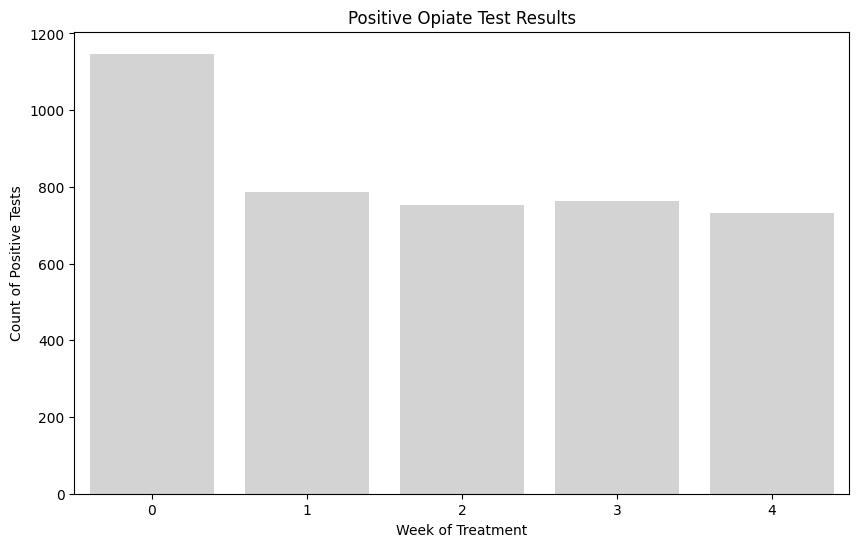

In [26]:
uds = data[[col for col in data.columns if 'test_' in col]].sum()
# leave the suffix only on each col
uds.index = uds.index.str.replace('test_Opiate300_', '')

# box plot for uds
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=uds.index, y=uds.values, color='lightgray')
plt.title('Positive Opiate Test Results')
plt.xlabel('Week of Treatment')
plt.ylabel('Count of Positive Tests')



In [16]:
uds

0    0.868282
1    0.595761
2    0.569266
3    0.577593
4    0.553369
dtype: float64

In [3]:
test_df, drug_dict = helper.agg_weekly_data(data, group='test_', agg='sum')

Series created for each drug class:
opi created with shape of: (5, 1)
opi created with shape of: (5, 1)
opi created with shape of: (5, 1)
opi created with shape of: (5, 1)
opi created with shape of: (5, 1)


NameError: name 'pro' is not defined

In [ ]:
#test_df.boxplot(figsize=(14, 6))
#sns boxplot


fig = plt.figure(figsize=(14, 6))

# create a boxplot for the test_df data
sns.boxplot(data=test_df, orient='v', color='lightgray')
# invert orientation to horizontal


plt.title('Urine Drug Screen Results', fontsize=16)
plt.ylabel('Number of Positive Drug Tests', fontsize=14)
plt.xlabel('Drug Class', fontsize=14)
# remove grid
plt.grid(False)
plt.show()

### Create a Markdown Table with Descriptive Statistics
- We will cover both the positive test rate and count of positive tests<br>

In [ ]:
# create descriptive stats for drug tests
drug_tests_pos_count = test_df.describe().round(2)

# convert to markdown for portability
drug_tests_pos_count.to_markdown()

# display markdown table through ipython display
display(Markdown(drug_tests_pos_count.to_markdown()))

### Review DSM Data
DSM provides the guidlines for diagnosing mental illness.<br>
DSM diagnosis is collected at baseline assesment<br>
The patient can have 3 different values for diagnosis for 6 drug classes:<br>
- Abuse
- Dependence
- No Diagnosis

<br>
The tables will be grouped by diagnosis to produce insights to the reader immediately<br>
<br>

**Abuse**
|    | column          | value   |   count |   percentage |
|---:|:----------------|:--------|--------:|-------------:|
| 21 | dsm_alcohol     | abuse   |     262 |         0.14 |
|  2 | dsm_cannabis    | abuse   |     218 |         0.11 |
|  8 | dsm_cocaine     | abuse   |     185 |         0.1  |
| 12 | dsm_sedative    | abuse   |     123 |         0.06 |
| 26 | dsm_amphetamine | abuse   |     109 |         0.06 |
| 18 | dsm_opiates     | abuse   |       1 |         0    |

**Dependence**
|    | column          | value      |   count |   percentage |
|---:|:----------------|:-----------|--------:|-------------:|
| 15 | dsm_opiates     | dependence |    1486 |         0.78 |
|  7 | dsm_cocaine     | dependence |     305 |         0.16 |
| 22 | dsm_alcohol     | dependence |     102 |         0.05 |
| 13 | dsm_sedative    | dependence |      90 |         0.05 |
|  3 | dsm_cannabis    | dependence |      73 |         0.04 |
| 27 | dsm_amphetamine | dependence |      67 |         0.03 |

**No Diagnosis**
 |    | column          | value        |   count |   percentage |
|---:|:----------------|:-------------|--------:|-------------:|
| 24 | dsm_amphetamine | no_diagnosis |    1311 |         0.68 |
| 10 | dsm_sedative    | no_diagnosis |    1274 |         0.66 |
|  0 | dsm_cannabis    | no_diagnosis |    1196 |         0.62 |
| 19 | dsm_alcohol     | no_diagnosis |    1123 |         0.59 |
|  5 | dsm_cocaine     | no_diagnosis |     997 |         0.52 |

In [ ]:
# This is the code that creates the markdown table above

# get the columns for the dsm data
dsm = data[[col for col in data.columns if col.startswith('dsm_')]]

# call helper function to extract the value counts and organize them into a table
dsm_vc = helper.df_value_counts(dsm)

# convert to markdown
dsm_vc.to_markdown()

# display markdown table through ipython display
display(Markdown(dsm_vc.to_markdown()))


In [ ]:
# reogroup the data into three tables to make it easier to read

# create list of group, each group will be a separate table
diagnosis = ['abuse', 'dependence', 'no_diagnosis']

# iterate through each diagnosis
for disorder in diagnosis:
    # create a dataframe for each disorder
    globals()[disorder] = dsm_vc[dsm_vc['value']==disorder]
    # sort values by count in descending order
    globals()[disorder] = globals()[disorder].sort_values(by='count', ascending=False)
    # convert to markdown
    globals()[disorder].to_markdown()
    # print the disorder before the ipython display
    print(disorder)
    display(Markdown(globals()[disorder].to_markdown()))

# save each variable to csv
for disorder in diagnosis:
    globals()[disorder].to_csv(f'../data/dsm/{disorder}.csv', index=False)
    

In [ ]:
# create 3 plots next to each other for abuse, dependence and no diagnosis
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, disorder in enumerate(diagnosis):
    # plot the data
    sns.barplot(data=globals()[disorder], x='column', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{disorder.capitalize()} ')
    # set the x label
    axes[i].set_xlabel(f'{disorder.capitalize()}')
    # set the y label
    axes[i].set_ylabel('Count')
    # Assuming axes is a collection of matplotlib Axes objects
    # remove 'dsm_' from xticklabels and rotate 45 degrees
    new_labels = [re.sub('dsm_', '', label) for label in globals()[disorder]['column']]
    axes[i].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');
# remove count from y axis
    axes[0].set_ylabel('')
    # remove xlabel
    axes[i].set_xlabel('')


### Review MDH: Medical and Psychiatric History Data
Medical and Psychiatric History: MDH<br>
Tracks medical and psychiatric history of 18 different Conditions<br>
With 3 possible responses for each condition:<br>
<br>

### Descriptive Statistics
There are 54 features to evaluate.<br>
Please contiue to scroll to review statistics for each patient history group<br>

In [ ]:
# create a new dataframe for the mdh data
mdh = data[[col for col in data.columns if col.startswith('mdh_')]]

# call helper function to extract the value counts and organize them into a table
mdh_vc = helper.df_value_counts(mdh)

# convert to markdown
mdh_vc.to_markdown()

print('mdh dataset shape:',mdh_vc.shape)
display(Markdown(mdh_vc.to_markdown()))

### Improve Readability
We will improve readability by breaking the data into 3 tables<br>
1. Patient Has History of Condition
2. Patient Does Not Have History of Condition
3. Patient Was Not Evaluated

In [ ]:
# create list of group, each group will be a separate table
patient_history = ['yes_history', 'no_history', 'not_evaluated']

# iterate through each medical history group
for history in patient_history:
    # create a dataframe for each history group
    globals()[history] = mdh_vc[mdh_vc['value']==history]
    # convert to markdown
    globals()[history].to_markdown()
    # sort values by count in descending order
    globals()[history] = globals()[history].sort_values(by='count', ascending=False)

    # print the history group before the ipython display
    print(history)
    display(Markdown(globals()[history].to_markdown()))


In [ ]:
# create 3 plots next to each other for yes, no and not evaluated
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, history in enumerate(patient_history):
    # plot the data
    sns.barplot(data=globals()[history], x='column', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{history.capitalize().replace("_", " ")}')
    # set the x label
    axes[i].set_xlabel(f'{history.capitalize()}')
    # set the y label
    axes[i].set_ylabel('Count')
    # Assuming axes is a collection of matplotlib Axes objects
    # remove 'mdh_' from xticklabels and rotate 45 degrees
    new_labels = [re.sub('mdh_', '', label) for label in globals()[history]['column']]
    axes[i].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');
# remove count from y axis
    axes[0].set_ylabel('')
    # remove the xlabel
    axes[i].set_xlabel('')



### Create Visualization
Use the column (feature) name as x, with either count or percent as y<br>
Visualize the 3 different values as hue in a bar plot<br>

### Review PEX: Physical Exam Data
Physical Exam: PEX<br>
Tracks the appearance and condition of patients for 12 different physical observations<br>
<br>


In [ ]:
# create pex table with value counts

# create df for pex data
pex = data[[col for col in data.columns if col.startswith('pex_')]]

# call helper function to extract the value counts and organize them into a table
pex_vc = helper.df_value_counts(pex)

pex_vc


In [ ]:

# create groups for evaluation status
evaluation = ['abnormal', 'normal', 'not_evaluated']

# iterate through each evaluation group
for status in evaluation:
    # create a dataframe for each evaluation group
    globals()[status] = pex_vc[pex_vc['value']==status]
    # convert to markdown
    globals()[status].to_markdown()
    # sort values by count in descending order
    globals()[status] = globals()[status].sort_values(by='count', ascending=False)
    # print the evaluation group before the ipython display
    print(status)
    display(Markdown(globals()[status].to_markdown()))


In [ ]:
# create 3 plots next to each other for abnormal, normal and not evaluated
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, status in enumerate(evaluation):
    # plot the data
    sns.barplot(data=globals()[status], x='column', y='count', ax=axes[i], color='lightgray')
    # set the title
    axes[i].set_title(f'{status.capitalize().replace("_", " ")} for Physical Exam')
    # set the x label
    axes[i].set_xlabel(f'{status.capitalize()}')
    # set the y label
    axes[i].set_ylabel('Count')
    # Assuming axes is a collection of matplotlib Axes objects
    # remove 'pex_' from xticklabels and rotate 45 degrees
    new_labels = [re.sub('pex_', '', label) for label in globals()[status]['column']]
    axes[i].set_xticklabels(new_labels, rotation=45, horizontalalignment='right');
# remove count from y axis
    axes[0].set_ylabel('')
    # remove the xlabel
    axes[i].set_xlabel('')


In [ ]:
df, dict = helper.agg_weekly_data(data, group='survey_', agg='sum')

In [ ]:
df.sum().plot(kind='bar', figsize=(14, 6), color='lightgray')
plt.title('Timeline Follow Back Survey Results', fontsize=16)
plt.ylabel('Total Instances of Self Reported Drug Use', fontsize=14)
plt.xlabel('Drug Class')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#barplot for df
fig = plt.figure(figsize=(14, 6))
plt.plot(kind='bar', data=df, color='lightgray')
plt.title('Timeline Follow Back Survey Results', fontsize=16)
plt.ylabel('Average Drug Use', fontsize=14)
plt.xlabel('Drug Class', fontsize=14)
plt.grid(False)
plt.show()

In [ ]:
# sns boxplot
fig = plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient='v', color='lightgray')
plt.title('Timeline Follow Back Survey Results', fontsize=16)
plt.ylabel('Number of Drug Use Days', fontsize=14)
plt.xlabel('Week of Treatment', fontsize=14)
plt.ylim(-100, 30000)
plt.grid(False)
plt.show()


### clean the dose record
Dose Record: DOS<br>
Records the medication, averge weekly dose and week of treatment<br>
<br>


In [ ]:
# create df for medication does
meds = data[[col for col in data.columns if col.startswith('meds_')]]

bupe = meds[[col for col in meds.columns if 'buprenorphine' in col]]

meth = meds[[col for col in meds.columns if 'methadone' in col]]

# Correct approach to modify column names
bupe.columns = [col.split('_')[-1] for col in bupe.columns]
meth.columns = [col.split('_')[-1] for col in meth.columns]

# create series and merge for plotting
bupe = bupe.mean().round(2).to_frame('buprenorphine')
meth = meth.mean().round(2).to_frame('methadone')

# merge
meds = pd.concat([bupe, meth], axis=1)



meds


